# **主題：將多張貓/狗圖像製作成影片**
## **系統開發環境需求：**
1. Python：3.7.13 (default, Mar 16 2022, 17:37:17) [GCC 7.5.0]
2. TensorFlow：2.8.0
3. Keras：2.8.0

## **系統開發環境檢查：**

In [ ]:
import sys
import tensorflow as tf
import keras

print("1. Python version：", sys.version)
print("2. TensorFlow version：", tf.__version__)
print("3. Keras version：", keras.__version__)

1. Python version： 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
2. TensorFlow version： 2.15.0
3. Keras version： 2.15.0


In [ ]:
#檢查是否有安裝 GPU
from tensorflow.python.client import device_lib

for d in device_lib.list_local_devices():
    print(d.name, d.device_type)
    print(d.physical_device_desc)

/device:CPU:0 CPU

/device:GPU:0 GPU
device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5


In [ ]:
!nvidia-smi

Tue Jan  2 10:51:38 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   74C    P0              32W /  70W |    103MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## **連結 Google Drive：**
### 1. unmount

In [7]:
from google.colab import drive
drive.flush_and_unmount()

### 2. mount

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **一、透過之前訓練過的模型做預測**
### **1. 載入之前訓練過的模型**

In [11]:
import os
import tensorflow as tf
from tensorflow import keras

#model = tf.keras.models.load_model("/content/drive/MyDrive/models/cats_dogs_model.h5")
model = tf.keras.models.load_model("/content/drive/MyDrive/112-1人工智慧/ai_ml_Final/model/4classification.keras")

### **2. 顯示模型摘要**

In [12]:
# Check its architecture
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

### **3. 從kaggle讀取測試資料集**

In [13]:
!pip install kaggle

**上傳Kaggle API 金鑰**

In [14]:
from google.colab import files

uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [15]:
#將上傳的 kaggle.json 檔案移動到 Kaggle 目錄下。
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [16]:
#從Kaggle下載動物圖片資料集做為測試圖片
!kaggle datasets download -d balraj98/horse2zebra-dataset #馬
!kaggle datasets download -d andrewmvd/sheep-detection #羊
!kaggle datasets download -d gpiosenka/yikes-spiders-15-species #蜘蛛
!kaggle datasets download -d devashishmahajan/animalsbutterflycowelephantsheepsquirrel #松鼠

 87% 97.0M/111M [00:00<00:00, 96.9MB/s]
100% 111M/111M [00:01<00:00, 112MB/s]  
 90% 37.0M/41.1M [00:00<00:00, 97.6MB/s]
100% 41.1M/41.1M [00:00<00:00, 82.3MB/s]
 85% 49.0M/57.5M [00:00<00:00, 123MB/s]
100% 57.5M/57.5M [00:00<00:00, 127MB/s]
 95% 156M/165M [00:01<00:00, 135MB/s]
100% 165M/165M [00:01<00:00, 126MB/s]


In [17]:
#解壓縮圖片資料集
!unzip horse2zebra-dataset.zip #會有trainAB
!unzip sheep-detection.zip #image
!unzip yikes-spiders-15-species.zip #test
!unzip animalsbutterflycowelephantsheepsquirrel.zip #animals/各動物

串流輸出內容已截斷至最後 5000 行。
  inflating: animals/cow/OIP-lQht-2a_p9rB3zTS9TiVtAHaCo.jpg  
  inflating: animals/cow/OIP-lQjlqvpsDYLU8lURE86XGgHaI4.jpg  
  inflating: animals/cow/OIP-lSYvNfOPvt6xogWSOgGyVAHaG5.jpg  
  inflating: animals/cow/OIP-lTJKEWz3gXoxaCiSDhcD9QHaFj.jpg  
  inflating: animals/cow/OIP-lU-RAPU4wSBA-3W8JWYtCgHaFj.jpg  
  inflating: animals/cow/OIP-lYz1OKvwxL9fRh-iddSmGAHaDj.jpg  
  inflating: animals/cow/OIP-lZAccZ02A-49WzhkYjLoYQHaEx.jpg  
  inflating: animals/cow/OIP-lZgn79g977RAGfHehAulDwHaE8.jpg  
  inflating: animals/cow/OIP-l_o5BaDwY6OY5ejYPJcnLAHaFT.jpg  
  inflating: animals/cow/OIP-ldqQ_gNjD_XTqSYR56rcBgHaE7.jpg  
  inflating: animals/cow/OIP-lemwT33GCmBpTQZ-EcZ_LQHaE8.jpg  
  inflating: animals/cow/OIP-lg06gAExMbKuoLrV41YW4wHaE7.jpg  
  inflating: animals/cow/OIP-llciAmnyqXhEEgL-Ln4vywHaFj.jpg  
  inflating: animals/cow/OIP-lmZL61gfjBnp-jXaWaQ6dAHaFS.jpg  
  inflating: animals/cow/OIP-lnoUvgf-OTyihyHAOarRuAHaEh.jpg  
  inflating: animals/cow/OIP-lobSWJcZ-mm_Z1HXCLSF

第一步：處理羊與蜘蛛圖片
*   羊圖片檔名皆為png，將其改為jpg
*   蜘蛛資料原有分種類，將子資料夾均拆開



In [18]:
import os
import shutil
import random
from IPython.display import Image, display

In [19]:
##用以將png改為jpg##
#羊的資料夾(images)為png檔

# 資料夾路徑
images_path = '/content/images'

# 獲取資料夾中所有檔案名稱
file_names = os.listdir(images_path)

# 過濾出 PNG 檔案
png_files = [file for file in file_names if file.lower().endswith('.png')]

# 將 PNG 檔案副檔名改為 JPG
for png_file in png_files:
    original_path = os.path.join(images_path, png_file)
    new_path = os.path.join(images_path, os.path.splitext(png_file)[0] + '.jpg')
    os.rename(original_path, new_path)

print(f"已將 {len(png_files)} 張 PNG 照片的副檔名改為 JPG。")

已將 203 張 PNG 照片的副檔名改為 JPG。


In [20]:
#用以處理多層子資料夾，將其存成另一資料夾#
#將蜘蛛的資料夾(原有多層子資料夾)拆解為一個主資料夾train_flatten
def flatten_and_remove_subfolders(source_path, destination_path):
    # 創建目的地資料夾
    os.makedirs(destination_path, exist_ok=True)

    # 遍歷所有子資料夾
    for root, dirs, files in os.walk(source_path):
        for file in files:
            source_image_path = os.path.join(root, file)
            destination_image_path = os.path.join(destination_path, file)
            shutil.move(source_image_path, destination_image_path)

    # 刪除所有子資料夾
    for subfolder in os.listdir(source_path):
        subfolder_path = os.path.join(source_path, subfolder)
        if os.path.isdir(subfolder_path):
            shutil.rmtree(subfolder_path)

    # 刪除原始資料夾
    shutil.rmtree(source_path)
    print(f"已將 {source_path} 中的所有子資料夾的照片提取至 {destination_path} 並刪除所有資料夾。")

# 因此資料集分成許多蜘蛛種類，將其拆開儲存
train_path = '/content/train'
train_spider_path = '/content/spider'
train_path2 = '/content/test'

# 提取所有子資料夾中的照片並刪除子資料夾
flatten_and_remove_subfolders(train_path, train_spider_path)
flatten_and_remove_subfolders(train_path2, train_spider_path)



已將 /content/train 中的所有子資料夾的照片提取至 /content/spider 並刪除所有資料夾。
已將 /content/test 中的所有子資料夾的照片提取至 /content/spider 並刪除所有資料夾。


第二步：將存有四種動物之資料夾將改名並放在主目錄下

In [21]:
##用以重新命名資料夾##
def rename_folder(old_folder_path, new_folder_path):
    # 確認舊資料夾存在
    if os.path.exists(old_folder_path) and os.path.isdir(old_folder_path):
        # 確認新資料夾不存在
        if not os.path.exists(new_folder_path):
            # 進行資料夾名稱更改
            os.rename(old_folder_path, new_folder_path)
            print(f"已將 {old_folder_path} 更名為 {new_folder_path}。")
        else:
            print(f"改名失敗，已存在新資料夾 {new_folder_path}。")
    else:
        print(f"舊資料夾 {old_folder_path} 不存在。")

# 將所需之圖片資料夾皆改為該動物名稱，以避免資料混亂
rename_folder('/content/images', '/content/sheep')
rename_folder('/content/trainA', '/content/horse')

已將 /content/images 更名為 /content/sheep。
已將 /content/trainA 更名為 /content/horse。


In [22]:
##用以移動資料夾##
#將 squirrel 資料夾移動到 /content 目錄下
def move_folder(source_path, destination_path):
    # 確認源資料夾存在
    if os.path.exists(source_path) and os.path.isdir(source_path):
        # 確認目標資料夾不存在
        if not os.path.exists(destination_path):
            # 移動資料夾
            shutil.move(source_path, destination_path)
            print(f"已將 {source_path} 移動至 {destination_path}。")
        else:
            print(f"移動失敗，目標資料夾 {destination_path} 已存在。")
    else:
        print(f"源資料夾 {source_path} 不存在。")


move_folder('/content/animals/squirrel', '/content/squirrel')

已將 /content/animals/squirrel 移動至 /content/squirrel。


In [23]:
# 要刪除的資料夾和檔案列表
folders_to_delete = [
    '/content/animals',
    '/content/annotations',
    '/content/testA',
    '/content/testB',
    '/content/trainB',
    '/content/valid'
]

files_to_delete = [
    '/content/spiders.csv',
    '/content/metadata.csv'
]

# 刪除資料夾
for folder in folders_to_delete:
    if os.path.exists(folder):
        shutil.rmtree(folder)
        print(f"已刪除資料夾: {folder}")
    else:
        print(f"資料夾不存在: {folder}")

# 刪除檔案
for file_path in files_to_delete:
    if os.path.exists(file_path):
        os.remove(file_path)
        print(f"已刪除檔案: {file_path}")
    else:
        print(f"檔案不存在: {file_path}")

已刪除資料夾: /content/animals
已刪除資料夾: /content/annotations
已刪除資料夾: /content/testA
已刪除資料夾: /content/testB
已刪除資料夾: /content/trainB
已刪除資料夾: /content/valid
已刪除檔案: /content/spiders.csv
已刪除檔案: /content/metadata.csv


抓取四種動物照片至test資料夾

In [24]:
def move_random_images(source_path, destination_path, num_images_to_select):
    # 獲取資料夾中所有檔案名稱
    file_names = os.listdir(source_path)

    # 創建目的地資料夾
    os.makedirs(destination_path, exist_ok=True)

    # 設定挑選的照片數量
    num_images_to_select = min(num_images_to_select, len(file_names))

    # 判斷是否挑選的數量不足
    if num_images_to_select < 1:
        print(f"資料夾 {source_path} 中的照片數量不足 {num_images_to_select} 張。")
        return

    # 隨機挑選照片
    random_images = random.sample(file_names, num_images_to_select)

    # 移動選中的照片到目的地資料夾
    for image in random_images:
        source_image_path = os.path.join(source_path, image)
        destination_image_path = os.path.join(destination_path, image)
        shutil.move(source_image_path, destination_image_path)

    print(f"已從 {source_path} 中隨機選取 {num_images_to_select} 張照片，放入 {destination_path} 資料夾。")


horse_path = '/content/horse'  #馬
sheep_path = '/content/sheep' #羊
spider_path = '/content/spider' #蜘蛛
squirrel_path='/content/squirrel' #松鼠

test_path = '/content/test' #存放位置

num_images_to_select = 250
move_random_images(horse_path, test_path, num_images_to_select)
move_random_images(sheep_path, test_path, num_images_to_select)
move_random_images(spider_path, test_path, num_images_to_select)
move_random_images(squirrel_path, test_path, num_images_to_select)

已從 /content/horse 中隨機選取 250 張照片，放入 /content/test 資料夾。
已從 /content/sheep 中隨機選取 203 張照片，放入 /content/test 資料夾。
已從 /content/spider 中隨機選取 194 張照片，放入 /content/test 資料夾。
已從 /content/squirrel 中隨機選取 250 張照片，放入 /content/test 資料夾。


將test資料夾內檔名重新編號

In [25]:
##重新編號##
def rename_files_with_sequence(folder_path):
    # 取得資料夾中所有檔案名稱
    file_names = os.listdir(folder_path)

    # 重新編號檔案名稱
    for i, file_name in enumerate(file_names, start=1):
        original_path = os.path.join(folder_path, file_name)

        # 確認新的編號檔案名稱是否已存在，若存在則重新計算
        new_file_name = f"{i}.jpg"
        while os.path.exists(os.path.join(folder_path, new_file_name)):
            i += 1
            new_file_name = f"{i}.jpg"

        new_path = os.path.join(folder_path, new_file_name)
        os.rename(original_path, new_path)

    print(f"已將 {folder_path} 中的所有檔案重新編號。")

# 範例使用方式
test_path = '/content/test'
rename_files_with_sequence(test_path)

已將 /content/test 中的所有檔案重新編號。


### **3. 從測試資料集任選一張圖片做測試**

影像路徑： /content/test/70.jpg
1/1 [==============================] - 1s 998ms/step
* 這張圖預測結果是：馬 (99.33%)


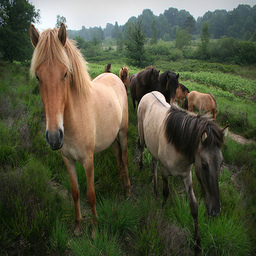

In [26]:
import os
import random
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

# 資料夾路徑
base_path = "/content/test"
class_name = ["馬", "羊", "蜘蛛", "松鼠"]

# 取得所有影像檔案路徑
all_image_paths = [os.path.join(root, file) for root, dirs, files in os.walk(base_path) for file in files]

# 從所有影像中隨機挑選一張
random_image_path = random.choice(all_image_paths)

# 載入圖檔，並縮放寬高為 (224, 224)
img = image.load_img(random_image_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# 顯示圖檔路徑
print(f"影像路徑： {random_image_path}")

# 進行預測
result = model.predict(x)
predict_class = np.argmax(result)

# 顯示預測結果
print(f"* 這張圖預測結果是：{class_name[predict_class]} ({result[0][predict_class]*100:.2f}%)")

# 顯示圖檔
from IPython.display import Image
Image(random_image_path, width=400)


### **4. 測試模型效果**

In [27]:
import os
import cv2

array_of_img = []  # this if for store all of the image data
# this function is for read image,the input is directory name
def read_directory(directory_name):
    # this loop is for read each image in this foder,
    # directory_name is the foder name with images.
    for filename in os.listdir(directory_name):
        #將檔案名稱 append 至 List：array_of_img
        array_of_img.append(filename)

    print(f"test 目錄內的圖檔數量：{len(array_of_img)}")
    #顯示前 5 筆圖檔名稱
    print(array_of_img[0:5])

In [28]:
#讀取測試資料集的圖檔名稱
read_directory("/content/test")

test 目錄內的圖檔數量：897
['547.jpg', '694.jpg', '851.jpg', '96.jpg', '517.jpg']


### **5. 選取測試資料集的所有圖片做推論**

In [29]:
#預測每張測試影像，並將結果儲存至predictions字典(EX：001.jpg：sheep、0.998569)
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

# 選取測試資料集的所有圖片做推論
predictions = {}

def inference(image_name):
    img_path = "/content/test/" + image_name
    class_names = ["horse", "sheep", "spider", "squirrel"]

    # 載入圖檔，並縮放寬高為 (224, 224)
    img = image.load_img(img_path, target_size=(224, 224))
    # 加一維，變成 (1, 224, 224, 3)，最後一維是色彩
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    result = model.predict(x)
    predict_class = np.argmax(result)
    predicted_class_name = class_names[predict_class]

    print(f"Inference: {image_name} ---> {predicted_class_name}")

    # 將預測結果存入字典
    predictions[image_name] = {
        'class_name': predicted_class_name,
        'probability': result[0][predict_class]
    }

# 進行推論
#all_files = list(set(horse + sheep + spider + squirrel))
for image_name in array_of_img:
    inference(image_name)

1/1 [==============================] - 0s 53ms/step
Inference: 547.jpg ---> sheep
1/1 [==============================] - 0s 47ms/step
Inference: 694.jpg ---> sheep
1/1 [==============================] - 0s 52ms/step
Inference: 851.jpg ---> spider
1/1 [==============================] - 0s 47ms/step
Inference: 96.jpg ---> sheep
1/1 [==============================] - 0s 49ms/step
Inference: 517.jpg ---> squirrel
1/1 [==============================] - 0s 52ms/step
Inference: 843.jpg ---> spider
1/1 [==============================] - 0s 47ms/step
Inference: 304.jpg ---> squirrel
1/1 [==============================] - 0s 48ms/step
Inference: 249.jpg ---> spider
1/1 [==============================] - 0s 51ms/step
Inference: 269.jpg ---> squirrel
1/1 [==============================] - 0s 62ms/step
Inference: 122.jpg ---> spider
1/1 [==============================] - 0s 49ms/step
Inference: 61.jpg ---> sheep
1/1 [==============================] - 0s 47ms/step
Inference: 865.jpg ---> horse
1/1 [

In [30]:
print(predictions)

{'547.jpg': {'class_name': 'sheep', 'probability': 0.59662175}, '694.jpg': {'class_name': 'sheep', 'probability': 0.99993634}, '851.jpg': {'class_name': 'spider', 'probability': 0.99838984}, '96.jpg': {'class_name': 'sheep', 'probability': 0.99997306}, '517.jpg': {'class_name': 'squirrel', 'probability': 0.99701905}, '843.jpg': {'class_name': 'spider', 'probability': 0.99994063}, '304.jpg': {'class_name': 'squirrel', 'probability': 0.9999567}, '249.jpg': {'class_name': 'spider', 'probability': 0.9998288}, '269.jpg': {'class_name': 'squirrel', 'probability': 0.5403995}, '122.jpg': {'class_name': 'spider', 'probability': 0.99993503}, '61.jpg': {'class_name': 'sheep', 'probability': 0.9997234}, '865.jpg': {'class_name': 'horse', 'probability': 0.997644}, '483.jpg': {'class_name': 'spider', 'probability': 0.9998005}, '153.jpg': {'class_name': 'horse', 'probability': 0.99957615}, '943.jpg': {'class_name': 'squirrel', 'probability': 0.9975994}, '62.jpg': {'class_name': 'sheep', 'probability'

In [31]:
len(predictions) #預測資料筆數

897

In [32]:
print(f"預測是「馬」有：{sum(result['class_name'] == 'horse' for result in predictions.values())} 張")
print(f"預測是「羊」有：{sum(result['class_name'] == 'sheep' for result in predictions.values())} 張")
print(f"預測是「蜘蛛」有：{sum(result['class_name'] == 'spider' for result in predictions.values())} 張")
print(f"預測是「松鼠」有：{sum(result['class_name'] == 'squirrel' for result in predictions.values())} 張")

預測是「馬」有：212 張
預測是「羊」有：247 張
預測是「蜘蛛」有：193 張
預測是「松鼠」有：245 張


## **二、將多張圖片合成影片**
### **1. 將預測為貓或狗的圖片合成影片 video.mp4**

In [33]:
import cv2
import numpy as np

# 定義文字顏色和字型
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.7
font_thickness = 2
text_color = (255, 255, 255)

# 定義影片寬高和 FPS
width, height = 640, 480
fps = 1
output_video_path = "/content/video.mp4"
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_writer = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

# 遍歷每張圖片
for image_name, result in predictions.items():
    img_path = "/content/test/" + image_name
    img = cv2.imread(img_path)

    # 調整圖片大小
    img = cv2.resize(img, (width, height))

    # 在圖片上加上類別名稱和機率
    text = f"{result['class_name']} ({result['probability']*100:.1f}%)"
    text_size = cv2.getTextSize(text, font, font_scale, font_thickness)[0]
    text_position = (img.shape[1] - text_size[0] - 10, text_size[1] + 10)
    cv2.putText(img, text, text_position, font, font_scale, text_color, font_thickness, cv2.LINE_AA)

    # 寫入影片
    video_writer.write(img)

# 釋放影片寫入器
video_writer.release()

In [34]:
import cv2
import numpy as np

# 定義文字顏色和字型
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.7
font_thickness = 2
text_color = (255, 255, 255)

# 定義影片寬高和 FPS
width, height = 640, 480
fps = 1
output_video_path = "/content/video.mp4"
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_writer = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

# 遍歷每張圖片
for image_name, result in predictions.items():
    img_path = "/content/test/" + image_name
    img = cv2.imread(img_path)

    # 調整圖片大小
    img = cv2.resize(img, (width, height))

    # 在圖片上加上類別名稱和機率
    text = f"{result['class_name']} ({result['probability']*100:.1f}%)"
    text_size = cv2.getTextSize(text, font, font_scale, font_thickness)[0]
    text_position = (img.shape[1] - text_size[0] - 10, text_size[1] + 10)

    # 加底色
    rect_start = (text_position[0] - 5, text_position[1] - text_size[1] - 5)
    rect_end = (text_position[0] + text_size[0] + 5, text_position[1] + 5)
    img = cv2.rectangle(img, rect_start, rect_end, (0, 0, 0), -1)  # -1 表示填充矩形

    # 加上文字
    cv2.putText(img, text, text_position, font, font_scale, text_color, font_thickness, cv2.LINE_AA)

    # 在左下角加上 "Made by KUAN & EDDIE"
    made_by_text = "Made by KUAN & EDDIE"
    made_by_position = (10, height - 20)
    made_by_text_size = cv2.getTextSize(made_by_text, font, font_scale, font_thickness)[0]

    # 加底色
    made_by_rect_start = (made_by_position[0] - 5, made_by_position[1] - made_by_text_size[1] - 5)
    made_by_rect_end = (made_by_position[0] + made_by_text_size[0] + 5, made_by_position[1] + 5)
    img = cv2.rectangle(img, made_by_rect_start, made_by_rect_end, (0, 0, 0), -1)  # -1 表示填充矩形

    # 加上文字
    cv2.putText(img, made_by_text, made_by_position, font, font_scale, text_color, font_thickness, cv2.LINE_AA)

    # 寫入影片
    video_writer.write(img)

# 釋放影片寫入器
video_writer.release()

### **2. 將 mp4 影片加入 mp3 做背景音樂**

In [35]:
!pip install pytube
!pip install moviepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.5 MB/s eta 0:00:00


In [36]:
#從yt下載音樂
import os
os.chdir('/content')

from pytube import YouTube
yt = YouTube('https://www.youtube.com/watch?v=111PWwyHZnI')
print('download...')
yt.streams.filter().get_audio_only().download(filename='music.mp3')
# 儲存為 mp3
print('ok!')

download...
ok!


In [37]:
#合併音樂和影片
from moviepy.editor import VideoFileClip, AudioFileClip
from moviepy.audio.fx.all import audio_fadein, audio_fadeout, audio_loop

# 影片和音樂的絕對路徑
video_path = "/content/video.mp4"
audio_path = "/content/music.mp3"

# 載入影片和音樂
video_clip = VideoFileClip(video_path)
audio_clip = AudioFileClip(audio_path)

# 檢查影片和音樂時長
video_duration = video_clip.duration
audio_duration = audio_clip.duration

# 判斷是否需要循環播放音樂
if video_duration > audio_duration:
    audio_clip = audio_loop(audio_clip, nloops=int(video_duration / audio_duration) + 1)
elif video_duration < audio_duration:
    # 如果影片比音樂短，就將音樂裁剪到與影片相同的長度
    audio_clip = audio_clip.subclip(0, video_duration)

# 設定音樂淡入淡出效果
fadein_duration = 2  # 淡入的時間
fadeout_duration = 2  # 淡出的時間
audio_clip = audio_clip.fx(audio_fadein, duration=fadein_duration).fx(audio_fadeout, duration=fadeout_duration)

# 將音樂合併到影片上
video_clip = video_clip.set_audio(audio_clip)

# 儲存結果影片
output_path = "/content/drive/MyDrive/112-1人工智慧/ai_ml_Final/output_with_sound.mp4"
video_clip.write_videofile(output_path, codec="libx264", audio_codec="aac")

Moviepy - Building video /content/drive/MyDrive/112-1人工智慧/ai_ml_Final/output_with_sound.mp4.
MoviePy - Writing audio in output_with_soundTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/112-1人工智慧/ai_ml_Final/output_with_sound.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/112-1人工智慧/ai_ml_Final/output_with_sound.mp4
